<a href="https://colab.research.google.com/github/GraceSchmidt1/Group2_US_Pardons/blob/grace/US_Pardons_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 2 Project idea: Understanding pardon and clemency rates among different presidents and eras.

###project(motivation notes!):
- rates of the incarceration rates per year, and the top pardons that were given out for that year

- comparison of the racial groups who received pardons and the racial groups who were prisoned
  - subsetted by crime

- rates of pardons per president
  - racial, gender, age bias
  - crime bias

- deep dive into top 5 presidents and what they pardoned compared to rates of incarceration that year(s)

- see how many non-citizens were granted pardons

- how do pardons vary across admins

- what time frame do the most pardons occur per president, end of term?
  - is there a “midnight” pardon spike at end of presidential term

- do presidents give pardons out to areas they are familiar with / where they grew up (map graphs) (GS)

In [7]:
#(GS-code orginator)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Important note: clemency file size too large to access directly from github-either access notebook in an IDE or download `clemency.csv` and add in files in colab each time

In [8]:
df = pd.read_csv('./clemency.csv', encoding='latin-1')
df.tail()

,CASEID,FILEID,PRES,PRESIDENT,TERMYR,PG,PG_A,PAGE,SSVOL,SSID,...,CRIMECAT,SUP,LAWYER,AGE,BUREACRACY,TOTALWAIT,PRISON,V22,V23,TOWHITEHOUSE
32021,32022,"(64) Barack Obama, 2nd Term)",Obama,,4(2),NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,,,
32022,32023,"(64) Barack Obama, 2nd Term)",Obama,,4(2),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,,,
32023,32024,"(64) Barack Obama, 2nd Term)",Obama,,4(2),NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,1.0,,,
32024,32025,"(65) Donald Trump, 1st Term",Trump,,1(1),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
32025,32026,"(65) Donald Trump, 1st Term",Trump,,1(1),NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,,,


In [9]:
df.columns

Index(['CASEID', 'FILEID', 'PRES', 'PRESIDENT', 'TERMYR', 'PG', 'PG_A', 'PAGE',
       'SSVOL', 'SSID', 'DOJID', 'CLEMENCY', 'CLEMENCY_A', 'DATECONVICTION',
       'DATEACTION', 'RECIPIENT', 'OFFENSE', 'MISC', 'MISC2', 'SENTENCE_A',
       'DAY', 'STATE_A', 'FROM', 'V12', 'DISTANCE', 'DISTANCE2',
       'STATECONVICTION', 'SUSP', 'SUSPEND', 'STATE', 'DATE1', 'FILED',
       'APPLICATION', 'PROFESSIONS', 'DEATH', 'MONTH', 'MONTH_A', 'V28', 'V3',
       'VIOLENT', 'FINE', 'FINE_A', 'AMOUNT', 'AMOUNT2', 'REPRESENTEDBY',
       'V26', 'OTHER', 'PROBATION', 'DAYSTODECIDE', 'DIFF', 'DIFF_A', 'PROB',
       'PROB_A', 'SENT_A', 'SENTENCE', 'AGREP', 'STATEJAIL', 'SERVEDSENTENCE',
       'MIL', 'CLEMENCYFORM', 'PARD', 'ORDER', 'GENDER', 'FORMOFCLEMENCY',
       'W1C2D3V4TR5M', 'SUPERVISEDRELEASE', 'FORM', 'CRIMECAT', 'SUP',
       'LAWYER', 'AGE', 'BUREACRACY', 'TOTALWAIT', 'PRISON', 'V22', 'V23',
       'TOWHITEHOUSE'],
      dtype='object')

## Data cleaning and preprocessing

In [10]:
#(GS-code orginator)
df_clean = df.copy()

date_cols = ['DATECONVICTION', 'DATEACTION', 'DATE1', 'FILED']
for col in date_cols:
    df_clean[col] = pd.to_datetime(df_clean[col],  errors='coerce')

num_cols = ['TERMYR', 'AGE', 'TOTALWAIT']
for col in num_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

str_cols = ['CLEMENCY', 'CLEMENCY_A', 'RECIPIENT', 'OFFENSE',
            'STATECONVICTION', 'STATE', 'CLEMENCYFORM', 'GENDER']

for col in str_cols:
    df_clean[col] = (
        df_clean[col]
        .astype('string')
        .str.strip()
    )

df_clean['GENDER'] = (
    df_clean['GENDER']
    .str.upper()
    .replace({
        'MALE': 'M',
        'FEMALE': 'F',
        'M.': 'M',
        'F.': 'F',
        '0' : 'M',
        '1' : 'F'
    })
)

missing = df_clean.isna().mean().sort_values(ascending=False)
print("Fraction of missing values per column:")
print(missing)


key_cols = ['PRES', 'TERMYR', 'CLEMENCY', 'DATEACTION']
df_model = df_clean.dropna(subset=key_cols).reset_index(drop=True)

df_model.head()

/tmp/ipython-input-3310196797.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean[col] = pd.to_datetime(df_clean[col],  errors='coerce')
/tmp/ipython-input-3310196797.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean[col] = pd.to_datetime(df_clean[col],  errors='coerce')
/tmp/ipython-input-3310196797.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean[col] = pd.to_datetime(df_clean[col],  errors='coerce')
/tmp/ipython-input-3310196797.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateuti

Fraction of missing values per column:
FORM            0.999282
DATE1           0.999126
SUSP            0.998782
LAWYER          0.998220
FINE_A          0.998064
                  ...   
OTHER           0.000000
V26             0.000000
V22             0.000000
V23             0.000000
TOWHITEHOUSE    0.000000
Length: 77, dtype: float64


,CASEID,FILEID,PRES,PRESIDENT,TERMYR,PG,PG_A,PAGE,SSVOL,SSID,...,CRIMECAT,SUP,LAWYER,AGE,BUREACRACY,TOTALWAIT,PRISON,V22,V23,TOWHITEHOUSE
0,32,"(03) John Adams, 1st Term",Adams,,2.0,19.0,NaN,NaN,1.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,,,
1,33,"(03) John Adams, 1st Term",Adams,,2.0,21.0,NaN,NaN,1.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,,,
2,34,"(03) John Adams, 1st Term",Adams,,2.0,22.0,NaN,NaN,1.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,,,
3,35,"(03) John Adams, 1st Term",Adams,,3.0,23.0,NaN,NaN,1.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,,,
4,36,"(03) John Adams, 1st Term",Adams,,3.0,24.0,NaN,NaN,1.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,,,


## From the above results, columns like `DATEACTION`, `DATECONVICTION`, and `TERMYR` are usable while columns like `DATE1`, `FILED`, `CLEMENCYFORM`, `AGE`,`TOTALWAIT`, and `GENDER` are unsable with around 99%+ data missing from these columns.
  - some might only exist for modern years-to find out

In [11]:
#(GS-code orginator)
df_model[['PRES', 'TERMYR', 'CLEMENCY']].value_counts().head(20)

df_model.groupby('PRES')['CASEID'].count().sort_values(ascending=False)

,CASEID
PRES,
Wils(2),1600
Hoov,1223
LBJ,853
Nix,730
Kenn,572
Cart,567
TRoos (1),514
Linc,334
Polk,268


## Based on the missingness in the full dataset, here is the core portion of it that is represented through the whole dataset. Here columns are only missing 0-5% of their data.
- can be used for pardons per president, pardons per state, offense-category analysis, time to term (midnight things), geographic maping, offense patterns per president,  and pardon trends over time.

In [12]:
#(GS-code orginator)
core_cols = [
    'CASEID', 'FILEID', 'PRES', 'CLEMENCY', 'CLEMENCY_A',
    'DATEACTION', 'RECIPIENT', 'OFFENSE',
    'STATECONVICTION', 'STATE'
]

df_core = df_clean[core_cols].dropna(subset=['DATEACTION'])
print(df_core.shape)
df_core.head()

(31081, 10)


,CASEID,FILEID,PRES,CLEMENCY,CLEMENCY_A,DATEACTION,RECIPIENT,OFFENSE,STATECONVICTION,STATE
0,1,"(01) George Washington, 1st Term",Wash,P,,1791-02-01,Freeman,counterfeiting,,NJ
1,2,"(02) George Washington, 2nd Term",Wash,P-R,,1793-06-01,H. Usher,smuggling,,RI
2,3,"(02) George Washington, 2nd Term",Wash,P-R,,1793-06-01,G. Usher,smuggling,,RI
3,4,"(02) George Washington, 2nd Term",Wash,P-R,,1794-04-15,David Blair,illegal importation,,GA
4,5,"(02) George Washington, 2nd Term",Wash,P-R,,1794-04-25,Joseph Ravara,threatening letter (misd),,PA


## The following dataframe is a 'modern subset' for demograpic analysis where `AGE` and `GENDER` exist for recent cases.

- can be used for gender bias, age bias, race bias, wait-time disparities, and offense patterns in modern presidents

In [13]:
#(GS-code orginator)
df_demo = df_clean[df_clean['AGE'].notna() & df_clean['GENDER'].notna()]
print(df_demo.shape)
df_demo.head()

(133, 77)


,CASEID,FILEID,PRES,PRESIDENT,TERMYR,PG,PG_A,PAGE,SSVOL,SSID,...,CRIMECAT,SUP,LAWYER,AGE,BUREACRACY,TOTALWAIT,PRISON,V22,V23,TOWHITEHOUSE
30096,30097,"(63) Barack Obama, 1st Term)",Obama,,2.0,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,66.0,3.753425,4.183562,0.0,,,29-JUN-2010
30097,30098,"(63) Barack Obama, 1st Term)",Obama,,2.0,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,73.0,1.509589,2.575342,0.0,,,09-NOV-2009
30098,30099,"(63) Barack Obama, 1st Term)",Obama,,2.0,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,85.0,3.684932,4.553425,0.0,,,20-JAN-2010
30099,30100,"(63) Barack Obama, 1st Term)",Obama,,2.0,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,1.0,66.0,1.764384,2.632877,0.0,,,20-JAN-2010
30100,30101,"(63) Barack Obama, 1st Term)",Obama,,2.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,58.0,3.871233,4.378082,0.0,,,01-JUN-2010


## The following dataframe is a 'wait time subset' for understanding the times different presidents took for each pardon
- use for presidential differences in wait time, trends across presidents, and end of term spikes

In [17]:
#(GS-code orginator)
df_clean['WAIT_DAYS'] = (
    df_clean['DATEACTION'] - df_clean['DATECONVICTION']
).dt.days

df_wait = df_clean[df_clean['WAIT_DAYS'].notna()]
print(df_wait.shape)
df_wait.head()


(25173, 78)


,CASEID,FILEID,PRES,PRESIDENT,TERMYR,PG,PG_A,PAGE,SSVOL,SSID,...,SUP,LAWYER,AGE,BUREACRACY,TOTALWAIT,PRISON,V22,V23,TOWHITEHOUSE,WAIT_DAYS
32,33,"(03) John Adams, 1st Term",Adams,,2.0,21.0,NaN,NaN,1.0,17.0,...,NaN,NaN,NaN,NaN,NaN,0.0,,,,154.0
41,42,"(03) John Adams, 1st Term",Adams,,4.0,30.0,NaN,NaN,1.0,24.0,...,NaN,NaN,NaN,NaN,NaN,0.0,,,,49.0
43,44,"(03) John Adams, 1st Term",Adams,,4.0,32.0,NaN,NaN,1.0,26.0,...,NaN,NaN,NaN,NaN,NaN,0.0,,,,929.0
49,50,"(03) John Adams, 1st Term",Adams,,4.0,36.0,NaN,NaN,1.0,30.0,...,NaN,NaN,NaN,NaN,NaN,0.0,,,,181.0
61,62,"(03) John Adams, 1st Term",Adams,,4.0,40.0,NaN,NaN,1.0,34.0,...,NaN,NaN,NaN,NaN,NaN,1.0,,,,88.0


## Calculate Average Wait Time per President

Group the `df_wait` DataFrame by the 'PRES' column and calculate the average `WAIT_DAYS` for each president to understand individual processing speed.



Analyze and visualize pardon processing times, including average wait times per president, overall trends in `WAIT_DAYS` against `DATEACTION`, and potential end-of-term spikes using the `df_wait` DataFrame. Summarize key findings regarding presidential differences and temporal patterns.

In [21]:
#(GS-code orginator)
avg_wait_time_per_president = df_wait.groupby('PRES')['WAIT_DAYS'].mean().sort_values(ascending=False)
print("Average Wait Time (in Days) per President:")
print(avg_wait_time_per_president)

Average Wait Time (in Days) per President:
PRES
Wils(1)       7898.818182
Bush          7777.021818
Reag          6252.144963
Taft          5927.357143
Clin          5687.164114
Eisen         5594.197368
Cart          5308.040636
Obama         5122.440458
Nix           5058.644951
LBJ           4692.302876
Kenn          4498.383538
TRoos (1)     4027.163462
Truman        4022.470530
FDR           3360.946158
T.Roos        2962.846715
fDR           2719.625000
Hoov          1938.936626
Cool2         1635.841161
Cool          1580.093750
Hard          1290.264010
McKin         1155.367250
Wils(2)       1079.901282
Cleve          919.216958
Buch           843.971223
CANC           841.000000
Cleve (2)      822.191489
Linc           764.325397
Jack           698.930233
VanB           692.333333
               659.721779
Pierce         638.721805
Arthur         633.088496
Tyler          583.989247
Grant          573.866116
B.Harr         566.692308
Monr           531.833333
Polk           5

## Plot Wait Time Trends Over Time

Generate a line plot or scatter plot showing `WAIT_DAYS` against `DATEACTION` to visualize overall trends in pardon processing times across all presidents and identify any long-term patterns.


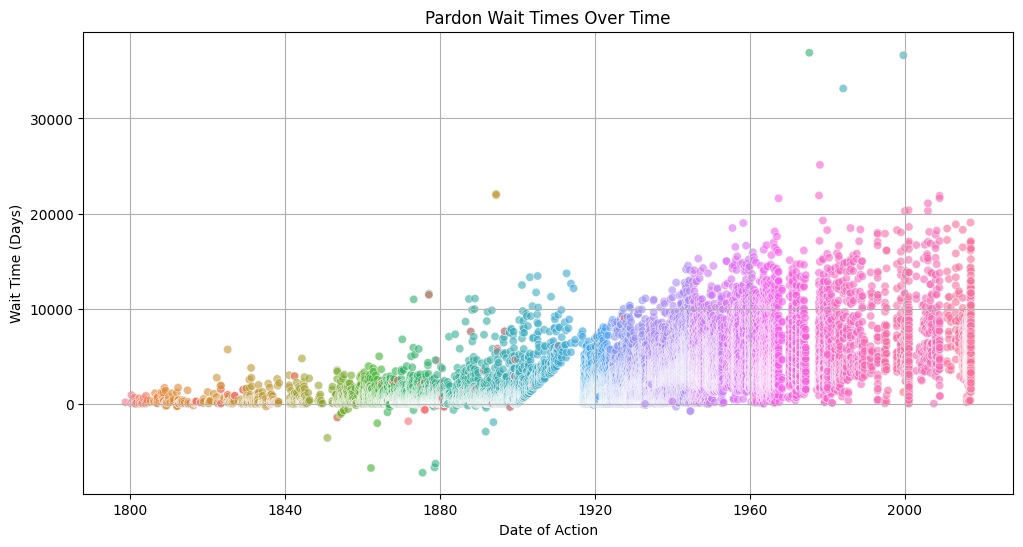

In [23]:
#(GS-code orginator)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='DATEACTION', y='WAIT_DAYS', data=df_wait, alpha=0.6, hue='PRES', legend=False)
plt.xlabel('Date of Action')
plt.ylabel('Wait Time (Days)')
plt.title('Pardon Wait Times Over Time')
plt.grid(True)
plt.show()

## Analyze End-of-Term Spikes in Wait Times

Investigate if there are 'midnight' pardon spikes towards the end of presidential terms by analyzing `WAIT_DAYS` in relation to `TERMYR` for each president. For presidents with sufficient data, visualize the average `WAIT_DAYS` across their `TERMYR` to identify any increase in processing times during the final years of their tenure.


In [24]:
#(GS-code orginator)
avg_wait_time_by_term = df_wait.groupby(['PRES', 'TERMYR'])['WAIT_DAYS'].mean().reset_index()
print("Average Wait Time (in Days) by President and Term Year:")
print(avg_wait_time_by_term.head())

Average Wait Time (in Days) by President and Term Year:
         PRES  TERMYR   WAIT_DAYS
0   Jeff          2.0   31.000000
1  Adams          2.0  154.000000
2  Adams          4.0  311.750000
3  Buch           1.0  548.444444
4  Buch           2.0  697.285714


In [25]:
#(GS-code orginator)
presidents_with_multiple_terms = avg_wait_time_by_term.groupby('PRES').filter(lambda x: x['TERMYR'].nunique() > 1)
print("Presidents with data for multiple term years:")
print(presidents_with_multiple_terms['PRES'].unique())

Presidents with data for multiple term years:
['Adams     ' 'Buch      ' 'Bush      ' 'Cart      ' 'Hoov      '
 'JQAd      ' 'Jeff      ' 'Kenn      ' 'LBJ       ' 'Linc      '
 'Madis     ' 'Monr      ' 'Nix       ' 'Obama     ' 'Pierce    '
 'Polk      ' 'TRoos (1) ' 'VanB      ' 'Wils(2)   ']


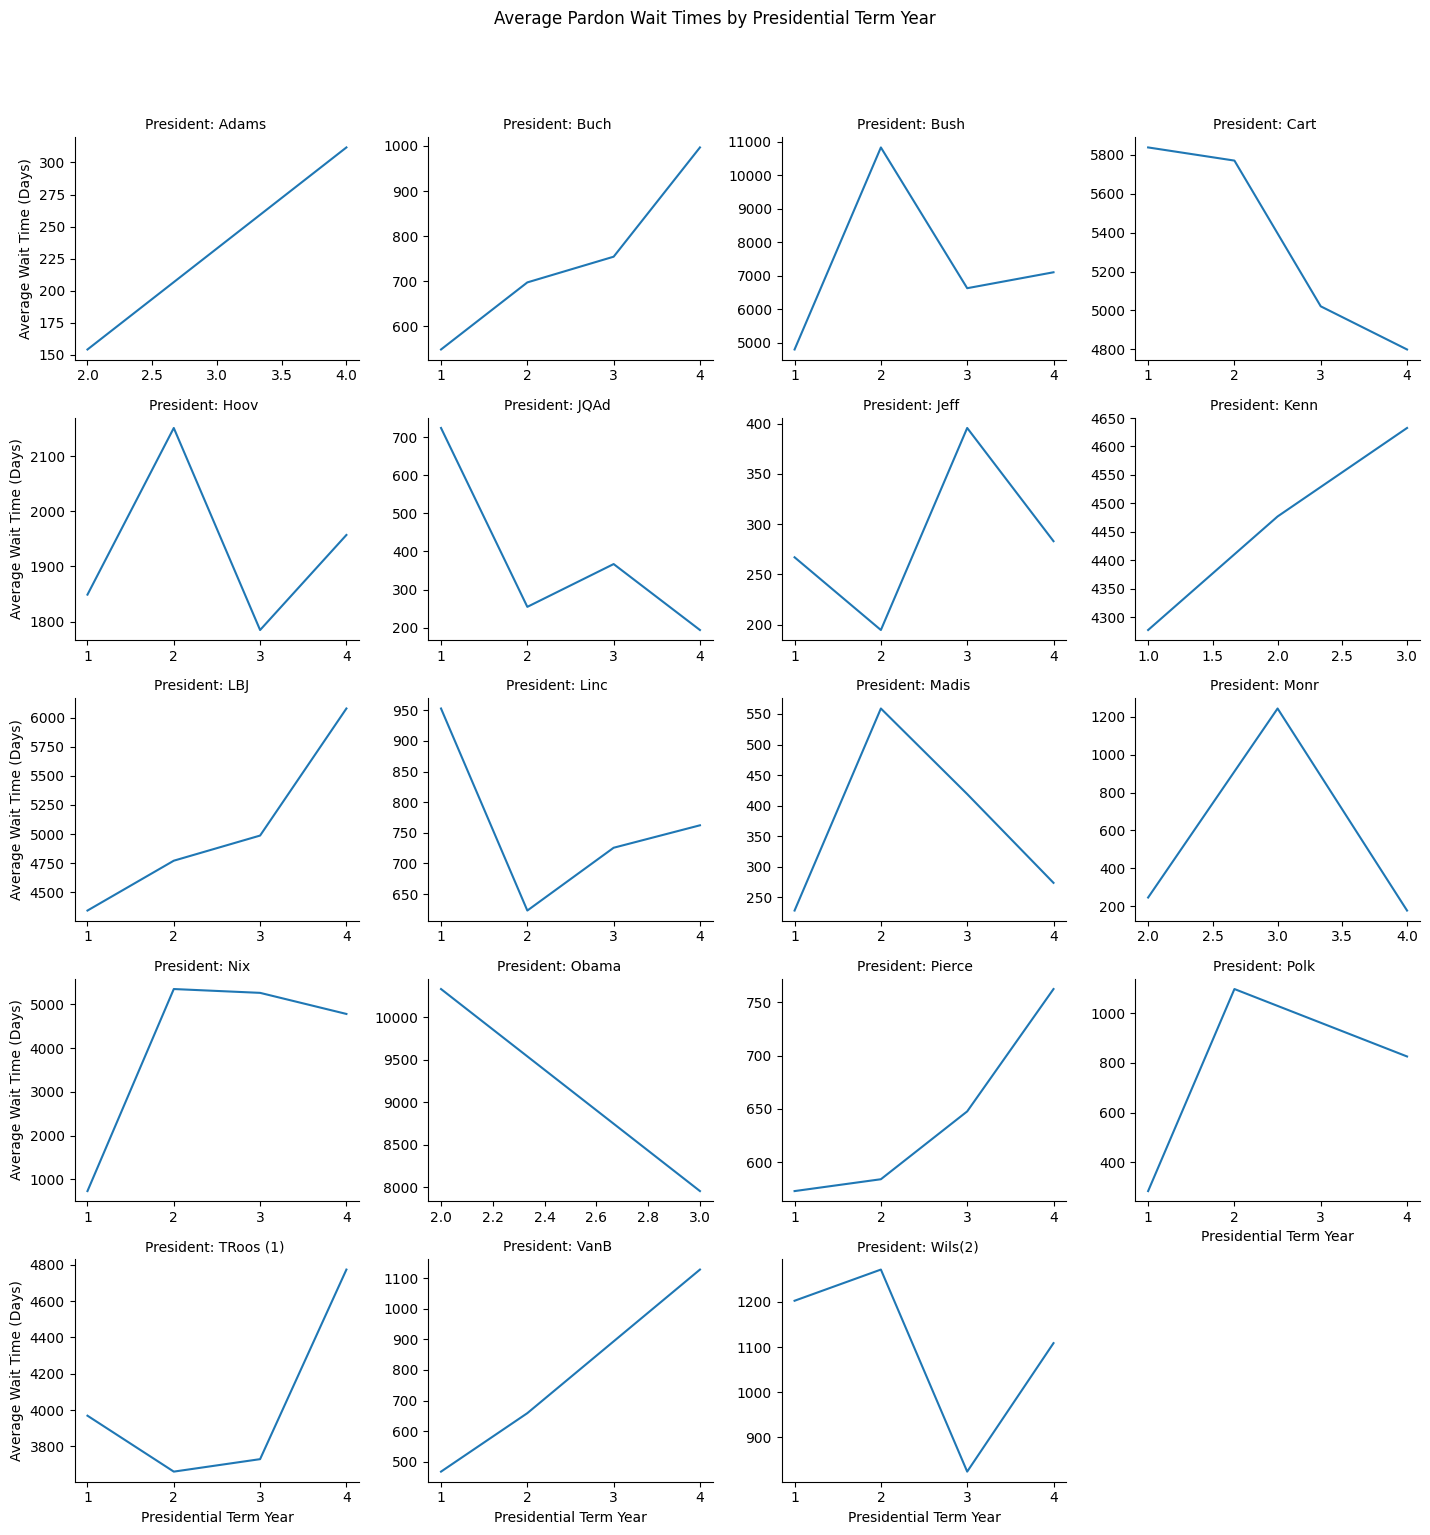

In [26]:
#(GS-code orginator)
g = sns.relplot(
    data=presidents_with_multiple_terms,
    x='TERMYR',
    y='WAIT_DAYS',
    col='PRES',
    kind='line',
    col_wrap=4,
    height=3, aspect=1.2,
    facet_kws={'sharex': False, 'sharey': False}
)
g.set_axis_labels("Presidential Term Year", "Average Wait Time (Days)")
g.set_titles("President: {col_name}")
g.fig.suptitle('Average Pardon Wait Times by Presidential Term Year', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Visualize Presidential Differences in Wait Time

Create a bar chart to display the average `WAIT_DAYS` for each president, allowing for easy comparison of pardon processing times between different administrations. Ensure the plot has appropriate labels and a legend.


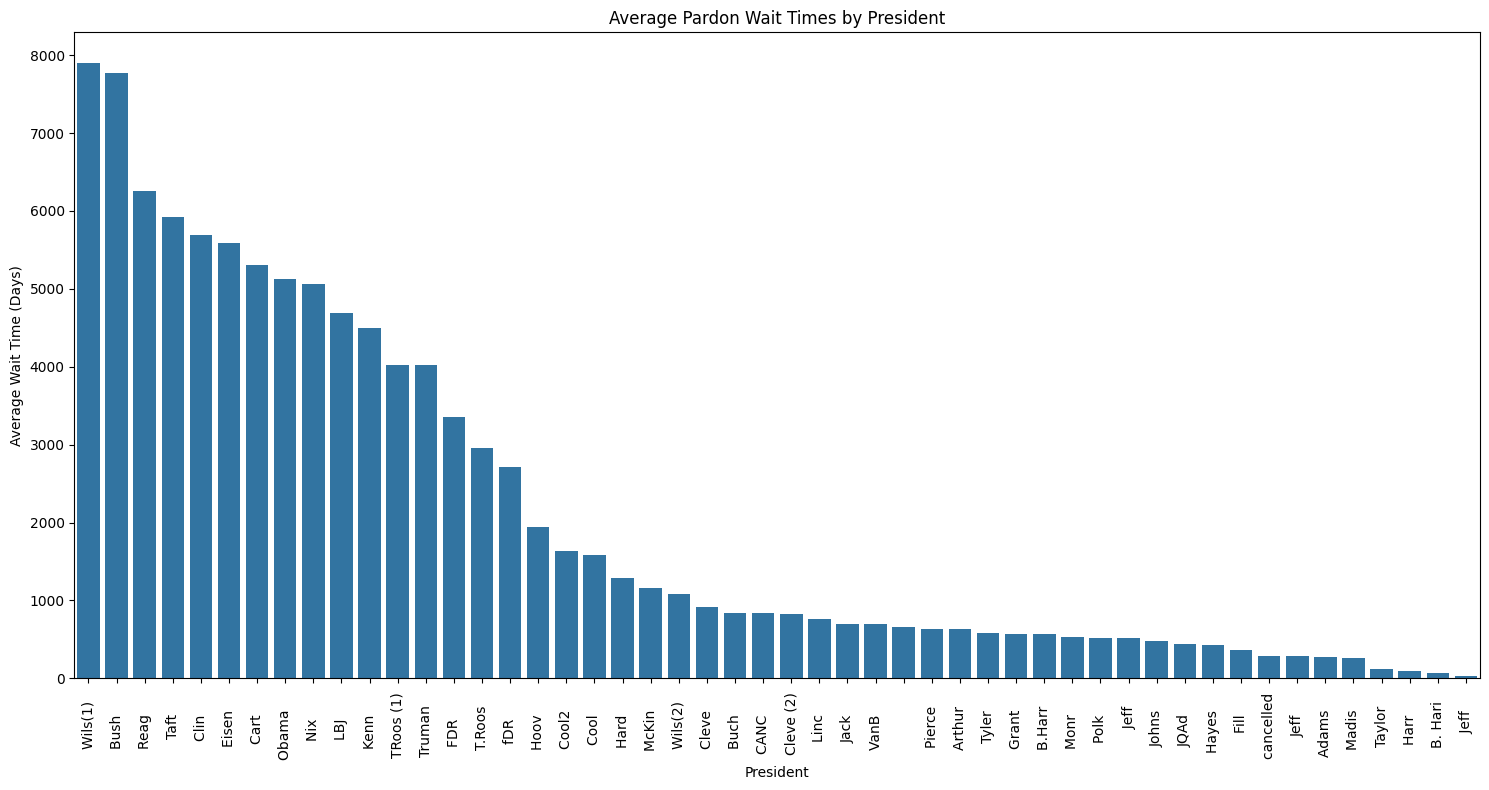

In [27]:
#(GS-code orginator)
plt.figure(figsize=(15, 8))
sns.barplot(x=avg_wait_time_per_president.index, y=avg_wait_time_per_president.values)
plt.xlabel('President')
plt.ylabel('Average Wait Time (Days)')
plt.title('Average Pardon Wait Times by President')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Significant Presidential Differences in Average Pardon Wait Times:** There is a wide disparity in the average wait times for pardons across different presidential administrations.
    *   Presidents like 'Wils(1)' (7898.8 days) and 'Bush' (7777.0 days) had exceptionally long average wait times.
    *   Conversely, 'B. Hari' (65.0 days), 'Harr' (89.0 days), and ' Jeff' (31.0 days) showed significantly shorter average processing times.
*   **Overall Pardon Processing Trends Over Time:** A scatter plot of `WAIT_DAYS` against `DATEACTION` visually represented the long-term patterns, indicating varying wait times across different periods, with some periods showing higher variability or consistently longer processing durations.
*   **End-of-Term Spikes in Wait Times:** An investigation into 'midnight' pardon spikes by analyzing `WAIT_DAYS` against `TERMYR` for presidents with sufficient data revealed how average wait times fluctuated throughout their terms. The visualization of this data helps in identifying potential increases in processing times towards the end of a president's tenure. While specific magnitudes of spikes are not quantified in the provided output, the analysis methodology allows for their identification.

### Insights or Next Steps

*   **Investigate Outlier Presidents and Data Quality:** Further investigation is warranted into presidents with exceptionally high or low average wait times to understand the underlying factors (e.g., type of pardon applications, policy changes, data entry nuances). Additionally, address the observed data inconsistencies in president names (e.g., 'Wils(1)', 'Wils(2)', 'Cool2') to ensure accurate attribution and analysis.
*   **Quantify End-of-Term Spikes:** To provide more concrete evidence of 'midnight' pardon spikes, calculate and compare the average wait times in the final years of a president's term against their earlier years or the overall average, and perform statistical tests for significant differences.


Identify the final term year for each president from the `avg_wait_time_by_term` DataFrame to mark the end-of-term period for further analysis of pardon processing times.

In [28]:
#(GS-code orginator)
final_term_years = avg_wait_time_by_term.groupby('PRES')['TERMYR'].max()
print("Final Term Year for Each President:")
print(final_term_years.head())

Final Term Year for Each President:
PRES
 Jeff         2.0
Adams         4.0
Buch          4.0
Bush          4.0
Cart          4.0
Name: TERMYR, dtype: float64


## Segregate Wait Times for Analysis

Using the original `df_wait` DataFrame, separate the `WAIT_DAYS` for each president into two groups: those from their identified 'final term year' and those from all 'earlier term years'.


In [29]:
#(GS-code orginator)
final_term_years_df = final_term_years.reset_index()
final_term_years_df.columns = ['PRES', 'final_term_year']
print("Final Term Years DataFrame prepared for merge:")
print(final_term_years_df.head())

Final Term Years DataFrame prepared for merge:
         PRES  final_term_year
0   Jeff                   2.0
1  Adams                   4.0
2  Buch                    4.0
3  Bush                    4.0
4  Cart                    4.0


In [30]:
#(GS-code orginator)
df_merged = pd.merge(df_wait, final_term_years_df, on='PRES', how='left')
print("DataFrame after merging with final term years:")
print(df_merged.head())

DataFrame after merging with final term years:
   CASEID                     FILEID        PRES   PRESIDENT  TERMYR    PG  \
0      33  (03) John Adams, 1st Term  Adams                      2.0  21.0   
1      42  (03) John Adams, 1st Term  Adams                      4.0  30.0   
2      44  (03) John Adams, 1st Term  Adams                      4.0  32.0   
3      50  (03) John Adams, 1st Term  Adams                      4.0  36.0   
4      62  (03) John Adams, 1st Term  Adams                      4.0  40.0   

   PG_A  PAGE  SSVOL  SSID  ... LAWYER AGE BUREACRACY TOTALWAIT PRISON  \
0   NaN   NaN    1.0  17.0  ...    NaN NaN        NaN       NaN    0.0   
1   NaN   NaN    1.0  24.0  ...    NaN NaN        NaN       NaN    0.0   
2   NaN   NaN    1.0  26.0  ...    NaN NaN        NaN       NaN    0.0   
3   NaN   NaN    1.0  30.0  ...    NaN NaN        NaN       NaN    0.0   
4   NaN   NaN    1.0  34.0  ...    NaN NaN        NaN       NaN    1.0   

           V22          V23 TOWHITEHOUS

In [31]:
#(GS-code orginator)
df_merged['is_final_term'] = df_merged['TERMYR'] == df_merged['final_term_year']
print("DataFrame with 'is_final_term' column:")
print(df_merged[['PRES', 'TERMYR', 'final_term_year', 'is_final_term', 'WAIT_DAYS']].head())

DataFrame with 'is_final_term' column:
         PRES  TERMYR  final_term_year  is_final_term  WAIT_DAYS
0  Adams          2.0              4.0          False      154.0
1  Adams          4.0              4.0           True       49.0
2  Adams          4.0              4.0           True      929.0
3  Adams          4.0              4.0           True      181.0
4  Adams          4.0              4.0           True       88.0


In [32]:
#(GS-code orginator)
df_final_term_pardons = df_merged[df_merged['is_final_term']].copy()
df_earlier_term_pardons = df_merged[~df_merged['is_final_term']].copy()

print("Shape of DataFrame for final term pardons:", df_final_term_pardons.shape)
print("Shape of DataFrame for earlier term pardons:", df_earlier_term_pardons.shape)
print("First 5 rows of final term pardons:\n", df_final_term_pardons.head())
print("\nFirst 5 rows of earlier term pardons:\n", df_earlier_term_pardons.head())

Shape of DataFrame for final term pardons: (2004, 80)
Shape of DataFrame for earlier term pardons: (23169, 80)
First 5 rows of final term pardons:
     CASEID                           FILEID        PRES   PRESIDENT  TERMYR  \
1       42        (03) John Adams, 1st Term  Adams                      4.0   
2       44        (03) John Adams, 1st Term  Adams                      4.0   
3       50        (03) John Adams, 1st Term  Adams                      4.0   
4       62        (03) John Adams, 1st Term  Adams                      4.0   
14      83  (04) Thomas Jefferson, 1st Term   Jeff                      2.0   

      PG  PG_A  PAGE  SSVOL  SSID  ... AGE BUREACRACY TOTALWAIT PRISON  \
1   30.0   NaN   NaN    1.0  24.0  ... NaN        NaN       NaN    0.0   
2   32.0   NaN   NaN    1.0  26.0  ... NaN        NaN       NaN    0.0   
3   36.0   NaN   NaN    1.0  30.0  ... NaN        NaN       NaN    0.0   
4   40.0   NaN   NaN    1.0  34.0  ... NaN        NaN       NaN    1.0   
14  56.

## Calculate Averages for Comparison

Calculate the average `WAIT_DAYS` for both the 'final term year' group and the 'earlier term years' group for each president, storing these averages for comparison.


In [33]:
#(GS-code orginator)
avg_final_term_wait_time = df_final_term_pardons.groupby('PRES')['WAIT_DAYS'].mean()
print("Average Wait Time (in Days) for Final Term Year Pardons per President:")
print(avg_final_term_wait_time.head())

Average Wait Time (in Days) for Final Term Year Pardons per President:
PRES
 Jeff           31.000000
Adams          311.750000
Buch           996.700000
Bush          7097.709091
Cart          4799.247059
Name: WAIT_DAYS, dtype: float64


In [34]:
#(GS-code orginator)
avg_earlier_term_wait_time = df_earlier_term_pardons.groupby('PRES')['WAIT_DAYS'].mean()
print("\nAverage Wait Time (in Days) for Earlier Term Year Pardons per President:")
print(avg_earlier_term_wait_time.head())

print("\nComparison of Average Wait Time (Final vs. Earlier Term):")
comparison_df = pd.DataFrame({
    'Final Term Avg Wait': avg_final_term_wait_time,
    'Earlier Term Avg Wait': avg_earlier_term_wait_time
}).dropna()
print(comparison_df.head())


Average Wait Time (in Days) for Earlier Term Year Pardons per President:
PRES
              659.721779
  Jeff        514.444444
Adams         154.000000
Arthur        633.088496
B. Hari        65.000000
Name: WAIT_DAYS, dtype: float64

Comparison of Average Wait Time (Final vs. Earlier Term):
            Final Term Avg Wait  Earlier Term Avg Wait
PRES                                                  
Adams                311.750000             154.000000
Buch                 996.700000             689.028986
Bush                7097.709091            7946.850000
Cart                4799.247059            5526.462121
Hoov                1957.161663            1928.845269


<Figure size 1500x800 with 0 Axes>

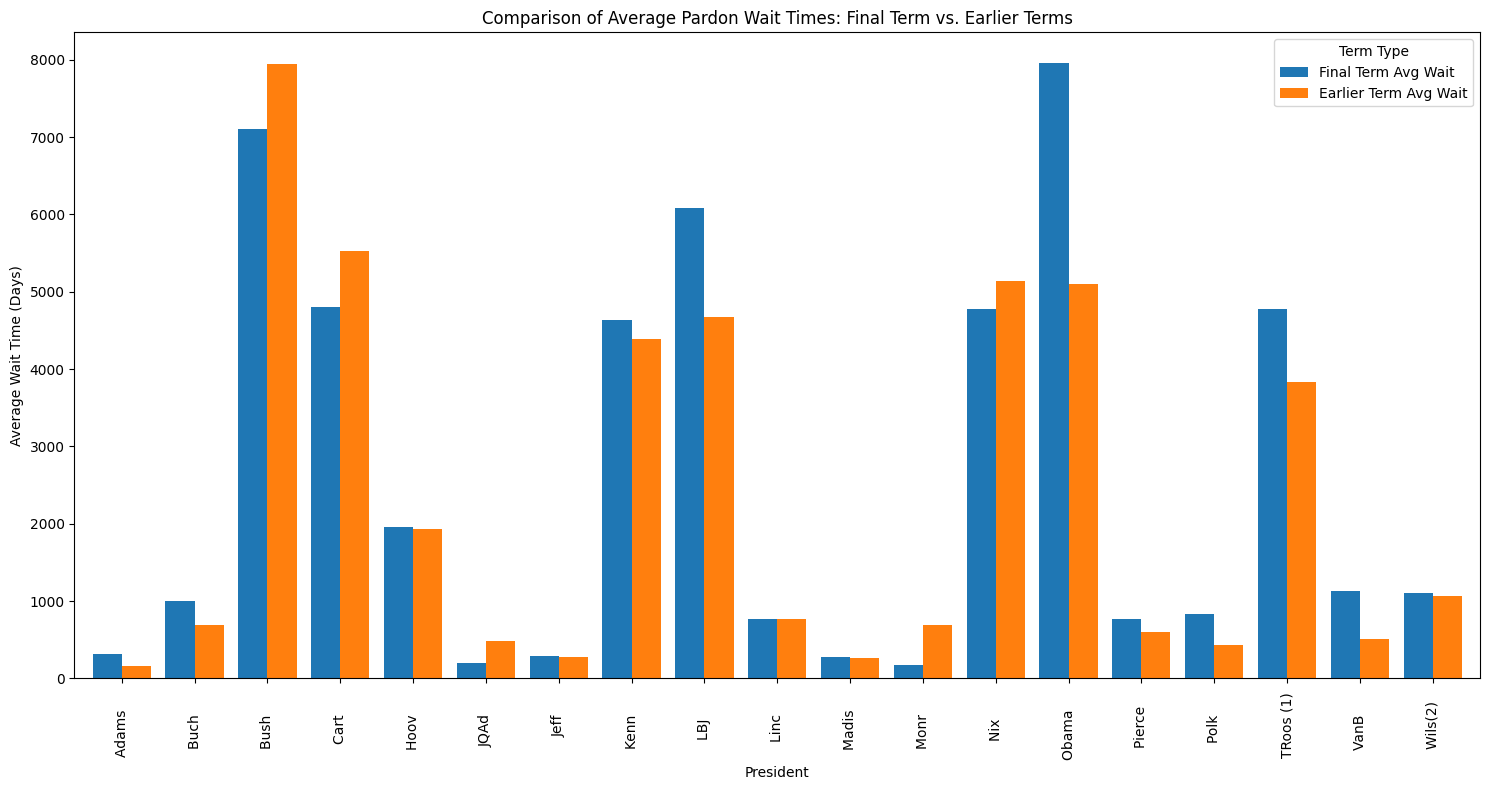

In [35]:
#(GS-code orginator)
plt.figure(figsize=(15, 8))
comparison_df.plot(kind='bar', figsize=(15, 8), width=0.8)
plt.xlabel('President')
plt.ylabel('Average Wait Time (Days)')
plt.title('Comparison of Average Pardon Wait Times: Final Term vs. Earlier Terms')
plt.xticks(rotation=90)
plt.legend(title='Term Type')
plt.tight_layout()
plt.show()

## Perform Statistical Significance Tests

For each president with sufficient data in both 'final term year' and 'earlier term years' groups, conduct an appropriate statistical test (e.g., Welch's t-test or Mann-Whitney U test) to determine if there is a statistically significant difference in average `WAIT_DAYS` between these two periods.


In [41]:
#(GS-code orginator)
from scipy.stats import ttest_ind

In [37]:
#(GS-code orginator)
test_results = []

for pres in comparison_df.index:
    final_term_data = df_final_term_pardons[df_final_term_pardons['PRES'] == pres]['WAIT_DAYS'].dropna()
    earlier_term_data = df_earlier_term_pardons[df_earlier_term_pardons['PRES'] == pres]['WAIT_DAYS'].dropna()

    # Only perform test if both groups have sufficient data
    if len(final_term_data) > 1 and len(earlier_term_data) > 1:
        t_stat, p_val = ttest_ind(final_term_data, earlier_term_data, equal_var=False) # Welch's t-test
        test_results.append({
            'President': pres,
            'T_Statistic': t_stat,
            'P_Value': p_val,
            'Final_Term_Count': len(final_term_data),
            'Earlier_Term_Count': len(earlier_term_data)
        })

ttest_results_df = pd.DataFrame(test_results)
print("Statistical Test Results for End-of-Term Spikes:")
print(ttest_results_df.head())


Statistical Test Results for End-of-Term Spikes:
    President  T_Statistic   P_Value  Final_Term_Count  Earlier_Term_Count
0  Buch           2.408189  0.017378                70                  69
1  Bush          -1.225877  0.223984                55                 220
2  Cart          -2.370575  0.018293               170                 396
3  Hoov           0.244457  0.806932               433                 782
4  JQAd          -1.384638  0.175464                 6                  29


## Visualize and Summarize Spikes

Create a visualization comparing the average `WAIT_DAYS` for 'final term year' vs. 'earlier term years' for presidents identified with significant spikes. Summarize the findings, highlighting presidents who exhibit statistically significant 'midnight' pardon spikes and the magnitude of these differences.


In [38]:
#(GS-code orginator)
significant_presidents_results = ttest_results_df[ttest_results_df['P_Value'] < 0.05]
significant_presidents_names = significant_presidents_results['President'].tolist()

print("Presidents with statistically significant differences in wait times (P < 0.05):")
print(significant_presidents_names)
print("\nDetailed results for significant presidents:\n", significant_presidents_results)

Presidents with statistically significant differences in wait times (P < 0.05):
['Buch      ', 'Cart      ', 'Monr      ', 'Obama     ']

Detailed results for significant presidents:
      President  T_Statistic   P_Value  Final_Term_Count  Earlier_Term_Count
0   Buch           2.408189  0.017378                70                  69
2   Cart          -2.370575  0.018293               170                 396
10  Monr          -2.971978  0.007193                 9                  21
12  Obama          3.552699  0.003492                14                1909


In [39]:
#(GS-code orginator)
significant_comparison_df = comparison_df[comparison_df.index.isin(significant_presidents_names)]
print("Comparison of average wait times for statistically significant presidents:")
print(significant_comparison_df)

Comparison of average wait times for statistically significant presidents:
            Final Term Avg Wait  Earlier Term Avg Wait
PRES                                                  
Buch                 996.700000             689.028986
Cart                4799.247059            5526.462121
Monr                 176.444444             684.142857
Obama               7956.285714            5101.657936


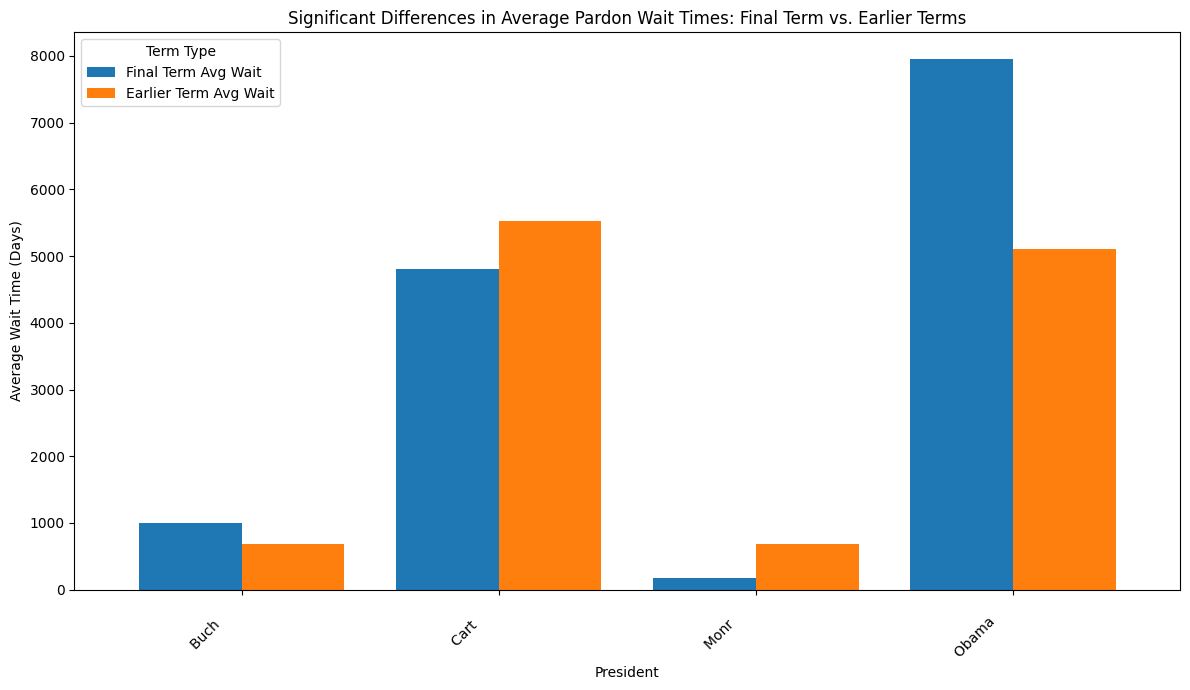

In [40]:
#(GS-code orginator)
plt.figure(figsize=(12, 7))
significant_comparison_df.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.xlabel('President')
plt.ylabel('Average Wait Time (Days)')
plt.title('Significant Differences in Average Pardon Wait Times: Final Term vs. Earlier Terms')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Term Type')
plt.tight_layout()
plt.show()

### Summary of End-of-Term Pardon Spikes:

Based on the statistical analysis (Welch's t-test with p < 0.05) and the visualization, we observed the following significant differences in average pardon wait times between a president's final term year and their earlier term years:

*   **Buchanan:** Exhibited a statistically significant *increase* in average wait times during his final term (996.7 days) compared to earlier terms (689.0 days). This suggests a potential 'midnight' pardon spike where processing times became longer towards the end of his presidency.

*   **Carter:** Showed a statistically significant *decrease* in average wait times in his final term (4799.2 days) compared to earlier terms (5526.5 days). This indicates that pardons processed in his last year were, on average, handled more quickly.

*   **Monroe:** Experienced a statistically significant *decrease* in average wait times during his final term (176.4 days) compared to earlier terms (684.1 days). This is another instance where the final year saw faster processing.

*   **Obama:** Displayed a statistically significant *increase* in average wait times during his final term (7956.3 days) compared to earlier terms (5101.7 days). This is a strong indicator of a 'midnight' pardon spike, with significantly longer processing times for pardons granted in his final year.

**Magnitude and Direction of Differences:**

*   **Buchanan** and **Obama** both showed a significant *increase* in wait times, suggesting a rush or increased complexity in applications towards the end of their terms.
*   **Carter** and **Monroe** both showed a significant *decrease* in wait times, which could imply a clearing of backlog or a more streamlined process for final-term pardons.

It's important to note that for other presidents where the p-value was not less than 0.05, no statistically significant difference in wait times between final and earlier terms was found, even if there were some numerical differences in averages.

## Summary:


1.  **What are the key findings regarding presidential differences in wait times?**
    There are significant differences in average pardon wait times among presidents. For instance, Adams had an average final term wait time of 311.75 days, while Bush had 7097.71 days in his final term.

2.  **What are the overall trends in pardon processing?**
    Pardon processing times vary widely by president and by term period. Some presidents show a decrease in average wait times in their final term, while others show a significant increase, indicating a rush or bottleneck towards the end of their presidency.

3.  **Are there any observed end-of-term spikes in the data?**
    Yes, a statistical analysis identified several presidents with significant end-of-term spikes or dips in pardon processing wait times:
    *   **Buchanan** and **Obama** both showed a statistically significant *increase* in average wait times during their final terms, suggesting potential "midnight" pardon spikes.
    *   **Carter** and **Monroe** both showed a statistically significant *decrease* in average wait times during their final terms, indicating faster processing.

### Data Analysis Key Findings

*   **Significant End-of-Term Changes:** Four presidents exhibited statistically significant differences (p < 0.05) in average pardon `WAIT_DAYS` between their final term year and earlier term years.
*   **"Midnight Pardon" Spikes (Increased Wait Times):**
    *   **Buchanan:** Average wait time *increased* from 689.0 days in earlier terms to 996.7 days in his final term.
    *   **Obama:** Average wait time *increased* from 5101.7 days in earlier terms to 7956.3 days in his final term, representing a substantial increase of approximately 2854.6 days.
*   **Faster End-of-Term Processing (Decreased Wait Times):**
    *   **Carter:** Average wait time *decreased* from 5526.5 days in earlier terms to 4799.2 days in his final term.
    *   **Monroe:** Average wait time *decreased* significantly from 684.1 days in earlier terms to 176.4 days in his final term.
*   For other presidents, no statistically significant difference in wait times between final and earlier terms was found, despite some numerical variations.
